In [1]:
import pandas as pd
import numpy as np
import math
from scipy.optimize import curve_fit

%matplotlib notebook
import matplotlib.pyplot as plt

from IPython.display import display
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

data_table = pd.read_csv('data.csv', header=0, sep='\t')
data_table

,Unnamed: 0,date,COM2.001: TC 110,COM2.001: TC 110.1,COM2.005: MPT 100,COM2.002: PPT 100
0,0,(YYYY-MM-DD hh:mm:ss),P309: ActualSpd (Hz),P316: DrvPower (W),P740: Pressure (mbar),P740: Pressure (mbar)
1,1,"2019-03-13, 10:15:42",0,0,1000.0,220.0
2,2,"2019-03-13, 10:15:44",0,0,1000.0,210.0
3,3,"2019-03-13, 10:15:46",0,0,1000.0,220.0
4,4,"2019-03-13, 10:15:48",0,0,1000.0,220.0
5,5,"2019-03-13, 10:15:50",0,0,1000.0,210.0
6,6,"2019-03-13, 10:15:52",0,0,1000.0,220.0
7,7,"2019-03-13, 10:15:54",0,0,1000.0,210.0
8,8,"2019-03-13, 10:15:56",0,0,1000.0,220.0
9,9,"2019-03-13, 10:15:58",0,0,1000.0,220.0


In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

data = np.array(data_table)
data = np.delete(data, 0, 0)
data = np.delete(data, 0, 1)

'''print(data[0])
print(data[1])
print(data[2])
print(data.shape)'''

data = np.transpose(data)

time = data[0]
frequency = data[1]
wattage = data[2]
p2 = data[3]
p1 = data[4]

s = 0
for i in range(len(time)):
    time[i] = s
    s += 2
    frequency[i] = float(frequency[i])
    wattage[i] = float(wattage[i])
    p1[i] = float(p1[i])
    p2[i] = float(p2[i])

'''print(time)
print(frequency)
print(wattage)
print(p1)
print(p2)'''

'print(time)\nprint(frequency)\nprint(wattage)\nprint(p1)\nprint(p2)'

<IPython.core.display.Javascript object>


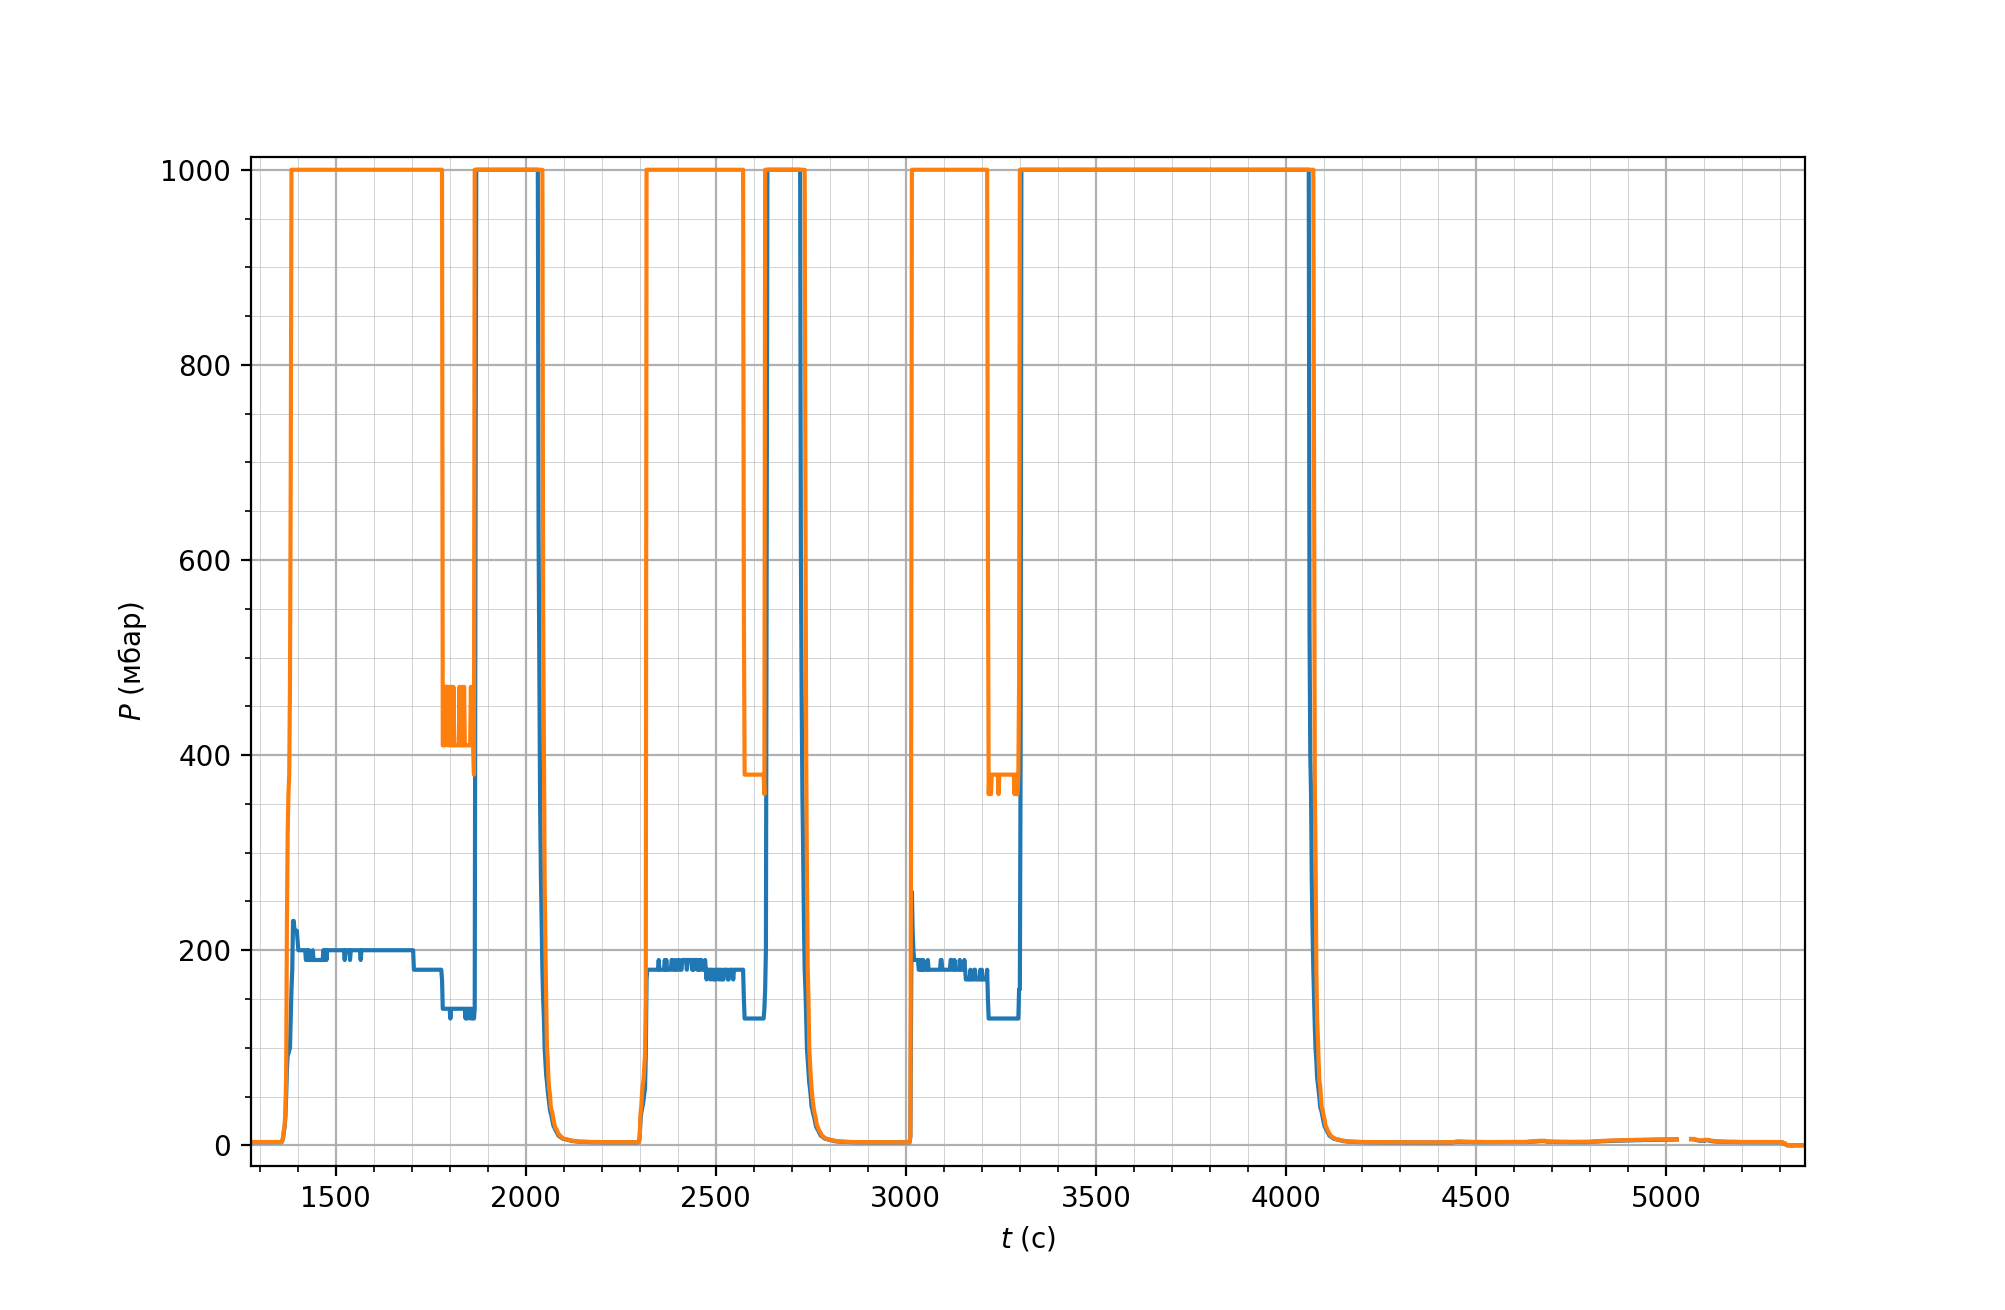

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linewidth='0.2')
plt.ylabel('$P$ (мбар)')
plt.xlabel('$t$ (с)')
plt.plot(time, p1)
plt.plot(time, p2)

Нулевая секунда в отсчете &mdash; 10:15:42

**VII.2.** Зная объём "запертого" в сильфоне воздуха (пп. II.3) определим, пользуясь законом Бойля-Мариотта, полный объём установки, высоковакуумной части (камера К), форвакуумной магистрали и самого насоса ТМН. Определим эти части на схеме, оцените погрешности.

Объем запертого в сильфоне воздуха $V_0 = 265$ мл.

По закону Бойля-Мариотта, при постоянных температуре и массе газа $PV=\mbox{const}$. В сильфоне воздух находится при атмосферном давлении $P_0 \approx 1000$ мбар. Измеряя давление воздуха по мере заполнения им установки, определим объем ее частей.

In [4]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

v0 = 265                   # мл
p = [1000, 200, 180, 140]  # мбар (из данных)

v1 = p[0] * v0 / p[1] - v0
print('Объем вакуумной камеры:' + ' ' * 7, round(v1, 2), 'мл')
v2 = p[0] * v0 / p[2] - v0 - v1
print('Объем форвакуумной магистрали:', round(v2, 2), 'мл')
v3 = p[0] * v0 / p[3] - v0 - v1 - v2
print('Объем ТМН:' + ' ' * 20, round(v3, 2), 'мл')
print('Полный объем установки:' + ' ' * 7, round(v0 + v1 + v2 + v3, 2), 'мл')

Объем вакуумной камеры:        1060.0 мл
Объем форвакуумной магистрали: 147.22 мл
Объем ТМН:                     420.63 мл
Полный объем установки:        1892.86 мл


**VII.3.** Из файла возьмем данные зависимости давления в камере К от времени откачки насосом ДН. По зависимости $\ln P$ от $t$ определим постоянную времени откачки $\tau$ (2.17) в диапазоне давлений $10^1$&mdash;$10^2$ мбар. Зная объём камеры К установки $V_0$ (пп. VII.2), рассчитаем эффективную скорость ее откачки $S_0$. Определим суммарную пропускную способность соответствующих выходов U (включая диафрагмы) (2.5).

<IPython.core.display.Javascript object>


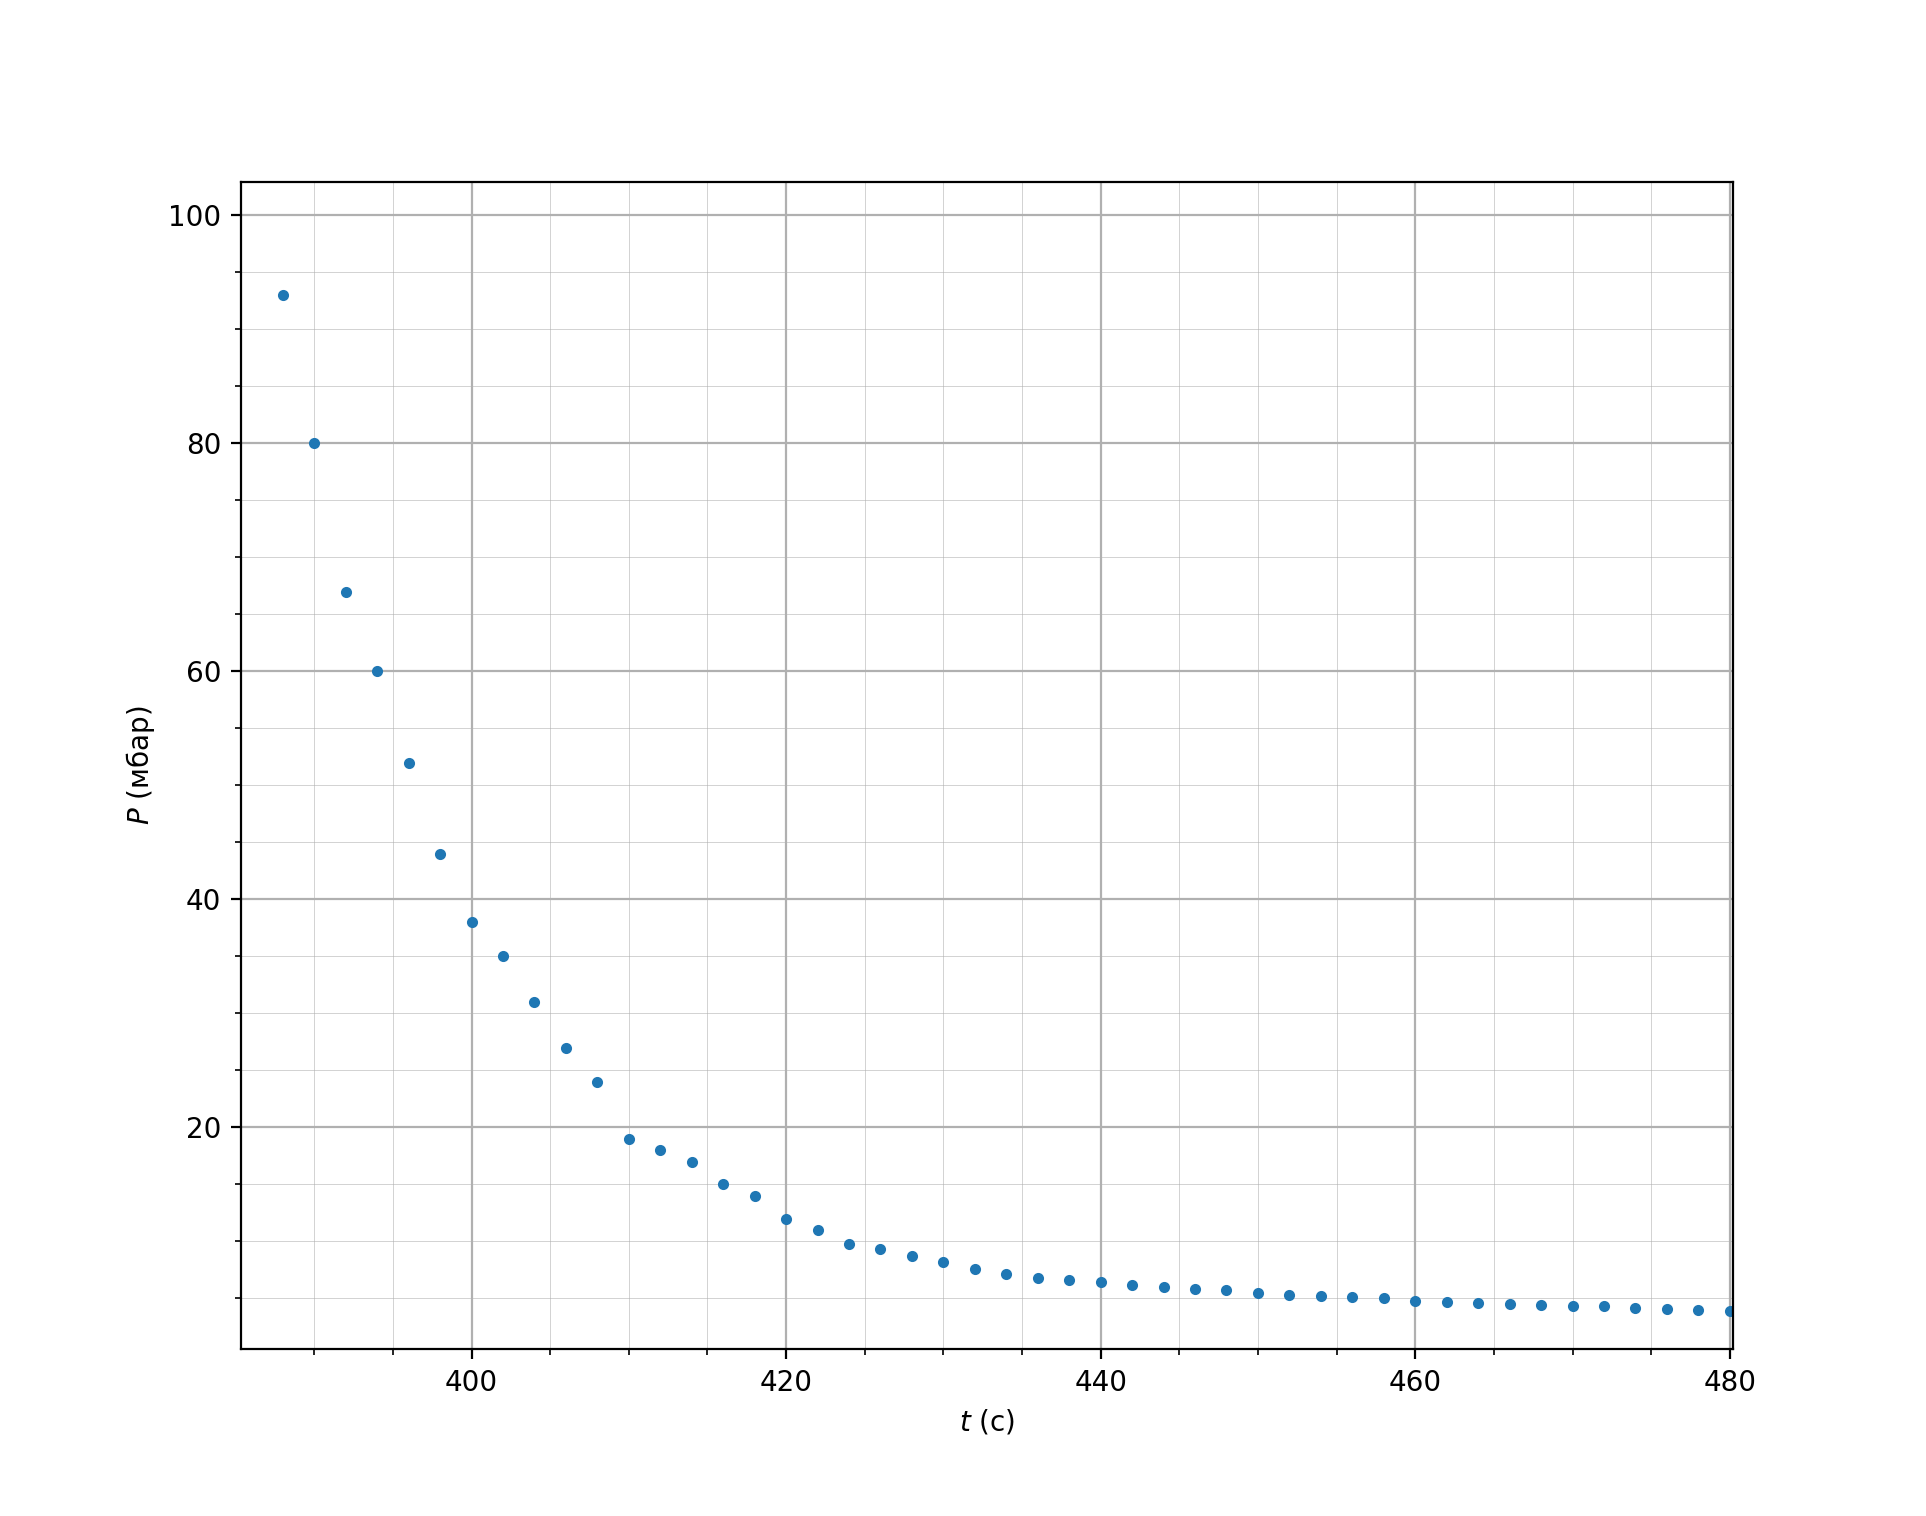

In [5]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linewidth='0.2')
plt.ylabel('$P$ (мбар)')
plt.xlabel('$t$ (с)')
plt.plot(time, p1, linestyle='', marker='.')

<IPython.core.display.Javascript object>


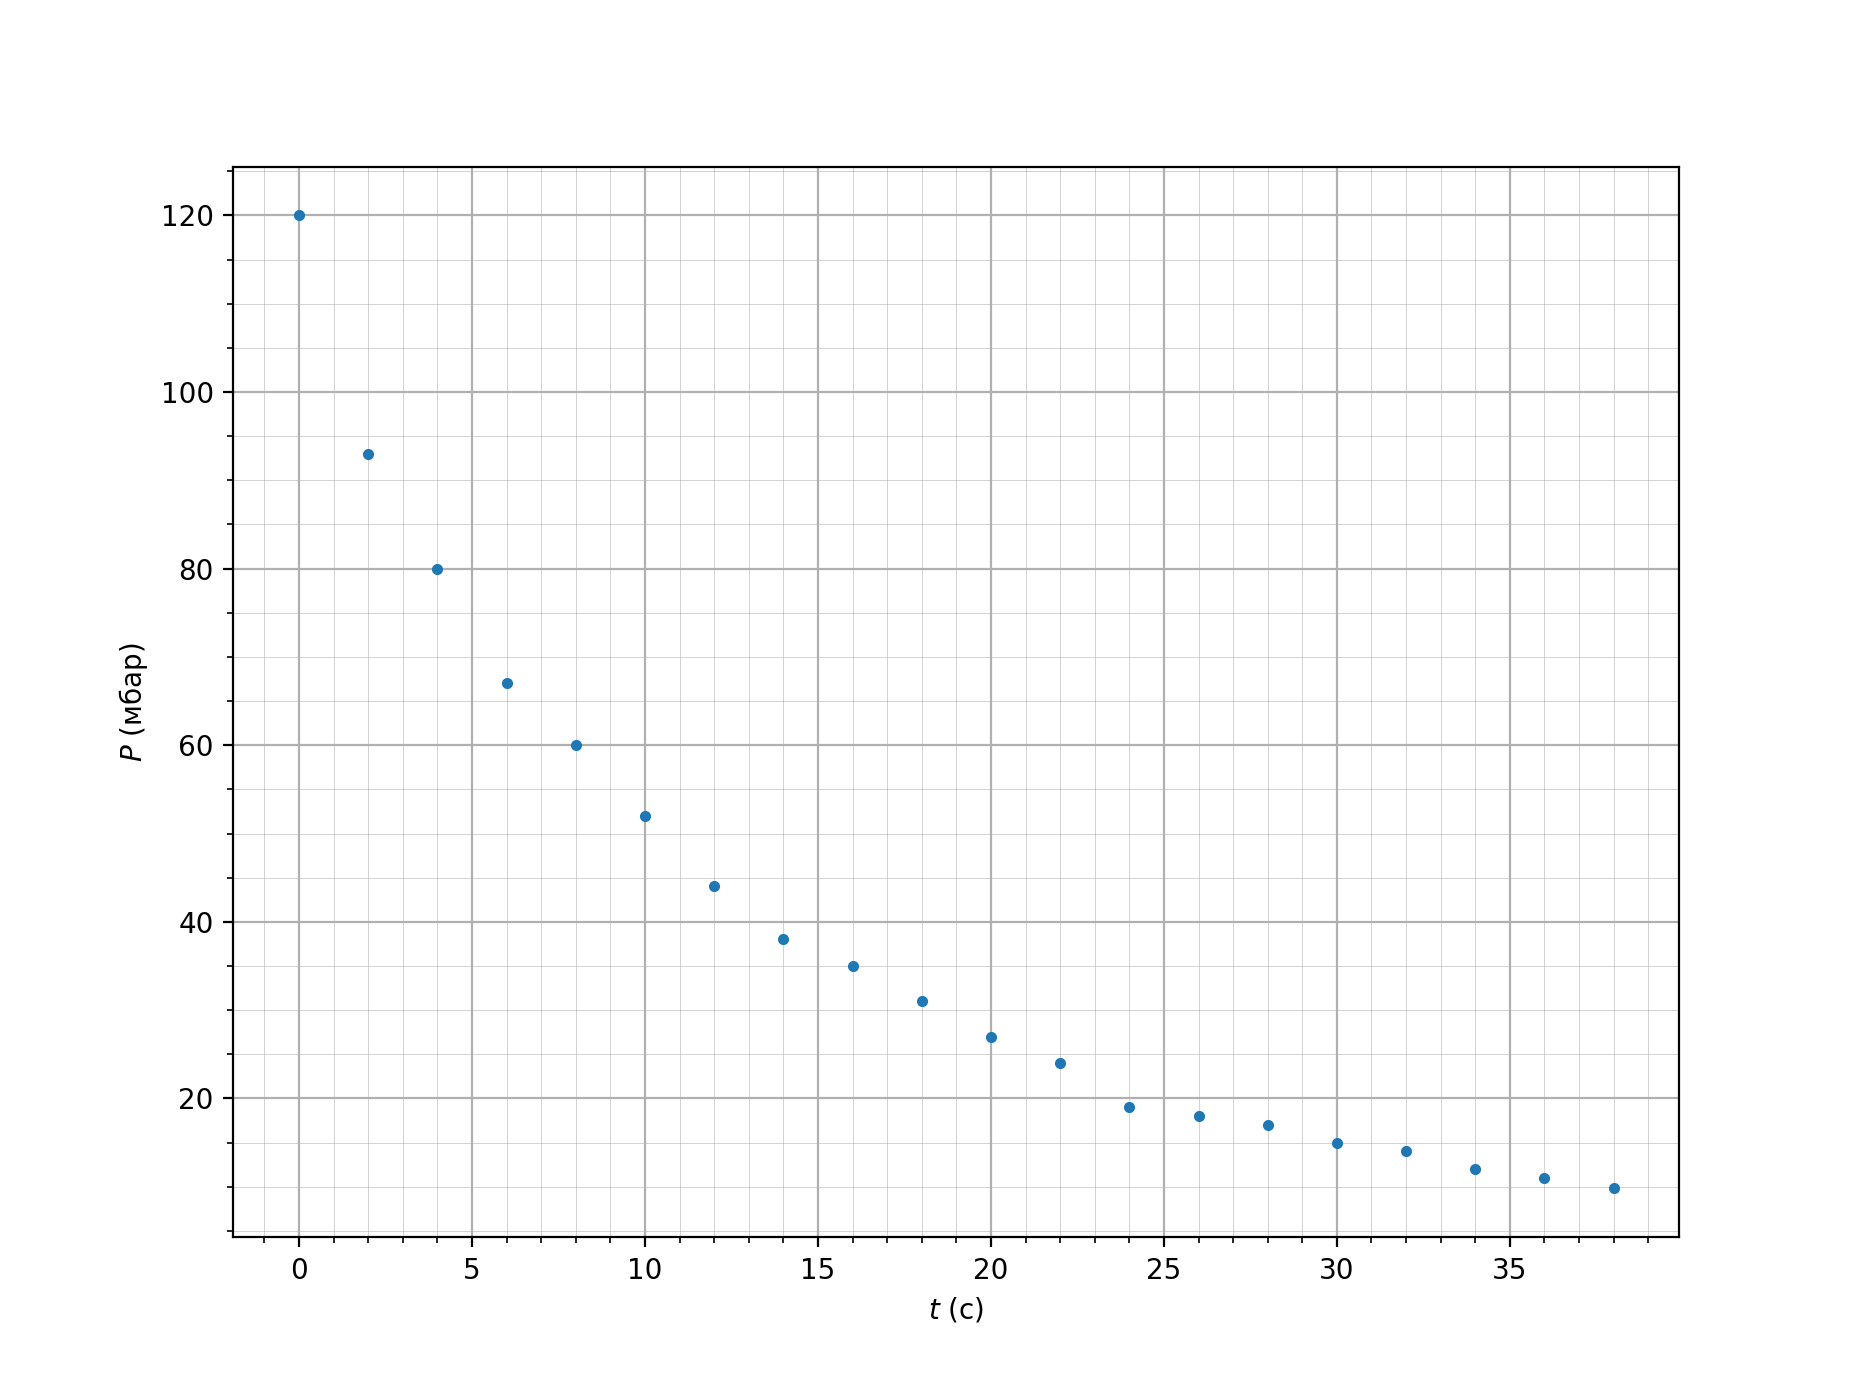

In [6]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

x0 = time[193:213] - time[193]
y0 = p1[193:213]

#print(x0)
#print(y0)

plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linewidth='0.2')
plt.ylabel('$P$ (мбар)')
plt.xlabel('$t$ (с)')
plt.plot(x0, y0, linestyle='', marker='.')

<IPython.core.display.Javascript object>


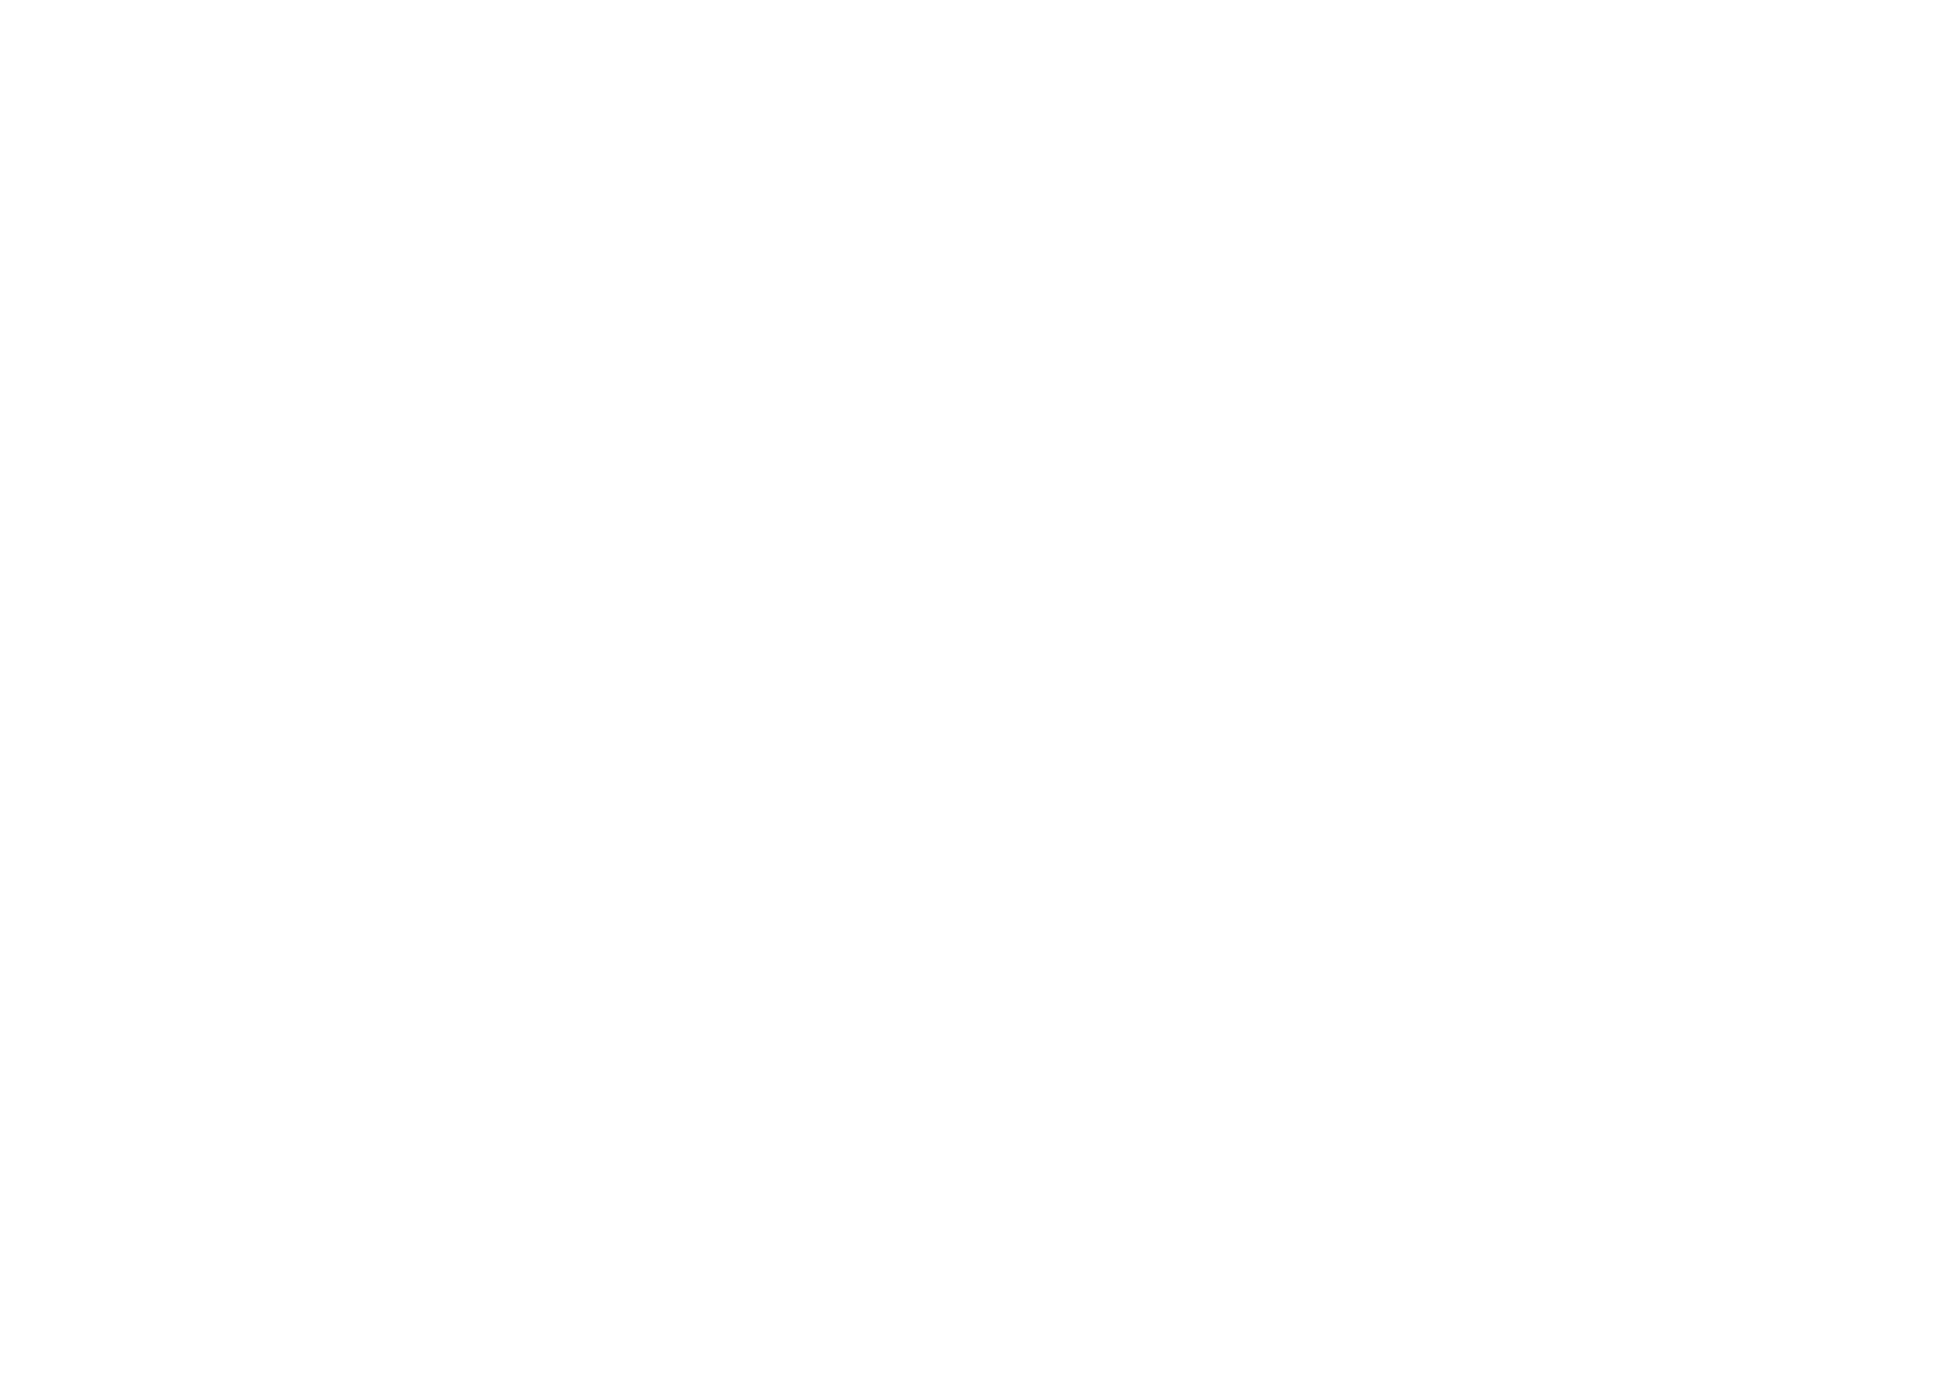

In [7]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

ln_p = np.array([math.log(y) for y in y0])
#print(ln_p)

plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linewidth='0.2')
plt.ylabel('$\ln P$')
plt.xlabel('$t$ (с)')
plt.plot(x0, ln_p, linestyle='', marker='.')

def f(x, a, b): 
    return a * x + b

xdata = np.arange(0, 40, 2)

tau_opt, tau_cov = curve_fit(f, xdata, ln_p)
#print(tau_opt)

plt.plot(xdata, f(xdata, *tau_opt))

$$dt = -\tau\frac{dP}{P}$$

$$t = -\tau\ln P$$

$$\ln P = -\frac{t}{\tau}$$

In [8]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

tau = -1 / tau_opt[0]
print('tau =', tau)
s0 = v1 * tau
print('Эффективная скорость откачки:', s0, 'мл/с')

tau = 15.739541267560702
Эффективная скорость откачки: 16683.913743614343 мл/с


$$\frac{1}{S_0} = \frac{1}{S_\text{н}} + \frac{1}{U}$$

$$S_\text{н} = 138,9 \ \frac{\text{мл}}{\text{с}}$$

In [9]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

s1 = 138.9
u = s0 * s1 / (s1 - s0)
print('U =', u)

U = -140.066104199064


**VII.4.** Из файла возьмем данные зависимости давления в камере К от времени откачки насосом ТМН. По зависимости $\ln P$ от $t$ определим постоянную времени откачки $\tau$ (2.17) в диапазоне давлений $10^{-5}$&mdash;$10^{-3}$ мбар. Зная объем камеры К установки $V_0$ (п. VII.2), рассчитаем эффективную скорость ее откачки $S_0$. Определим пропускную способность диафрагм $U$ (2.5).

<IPython.core.display.Javascript object>


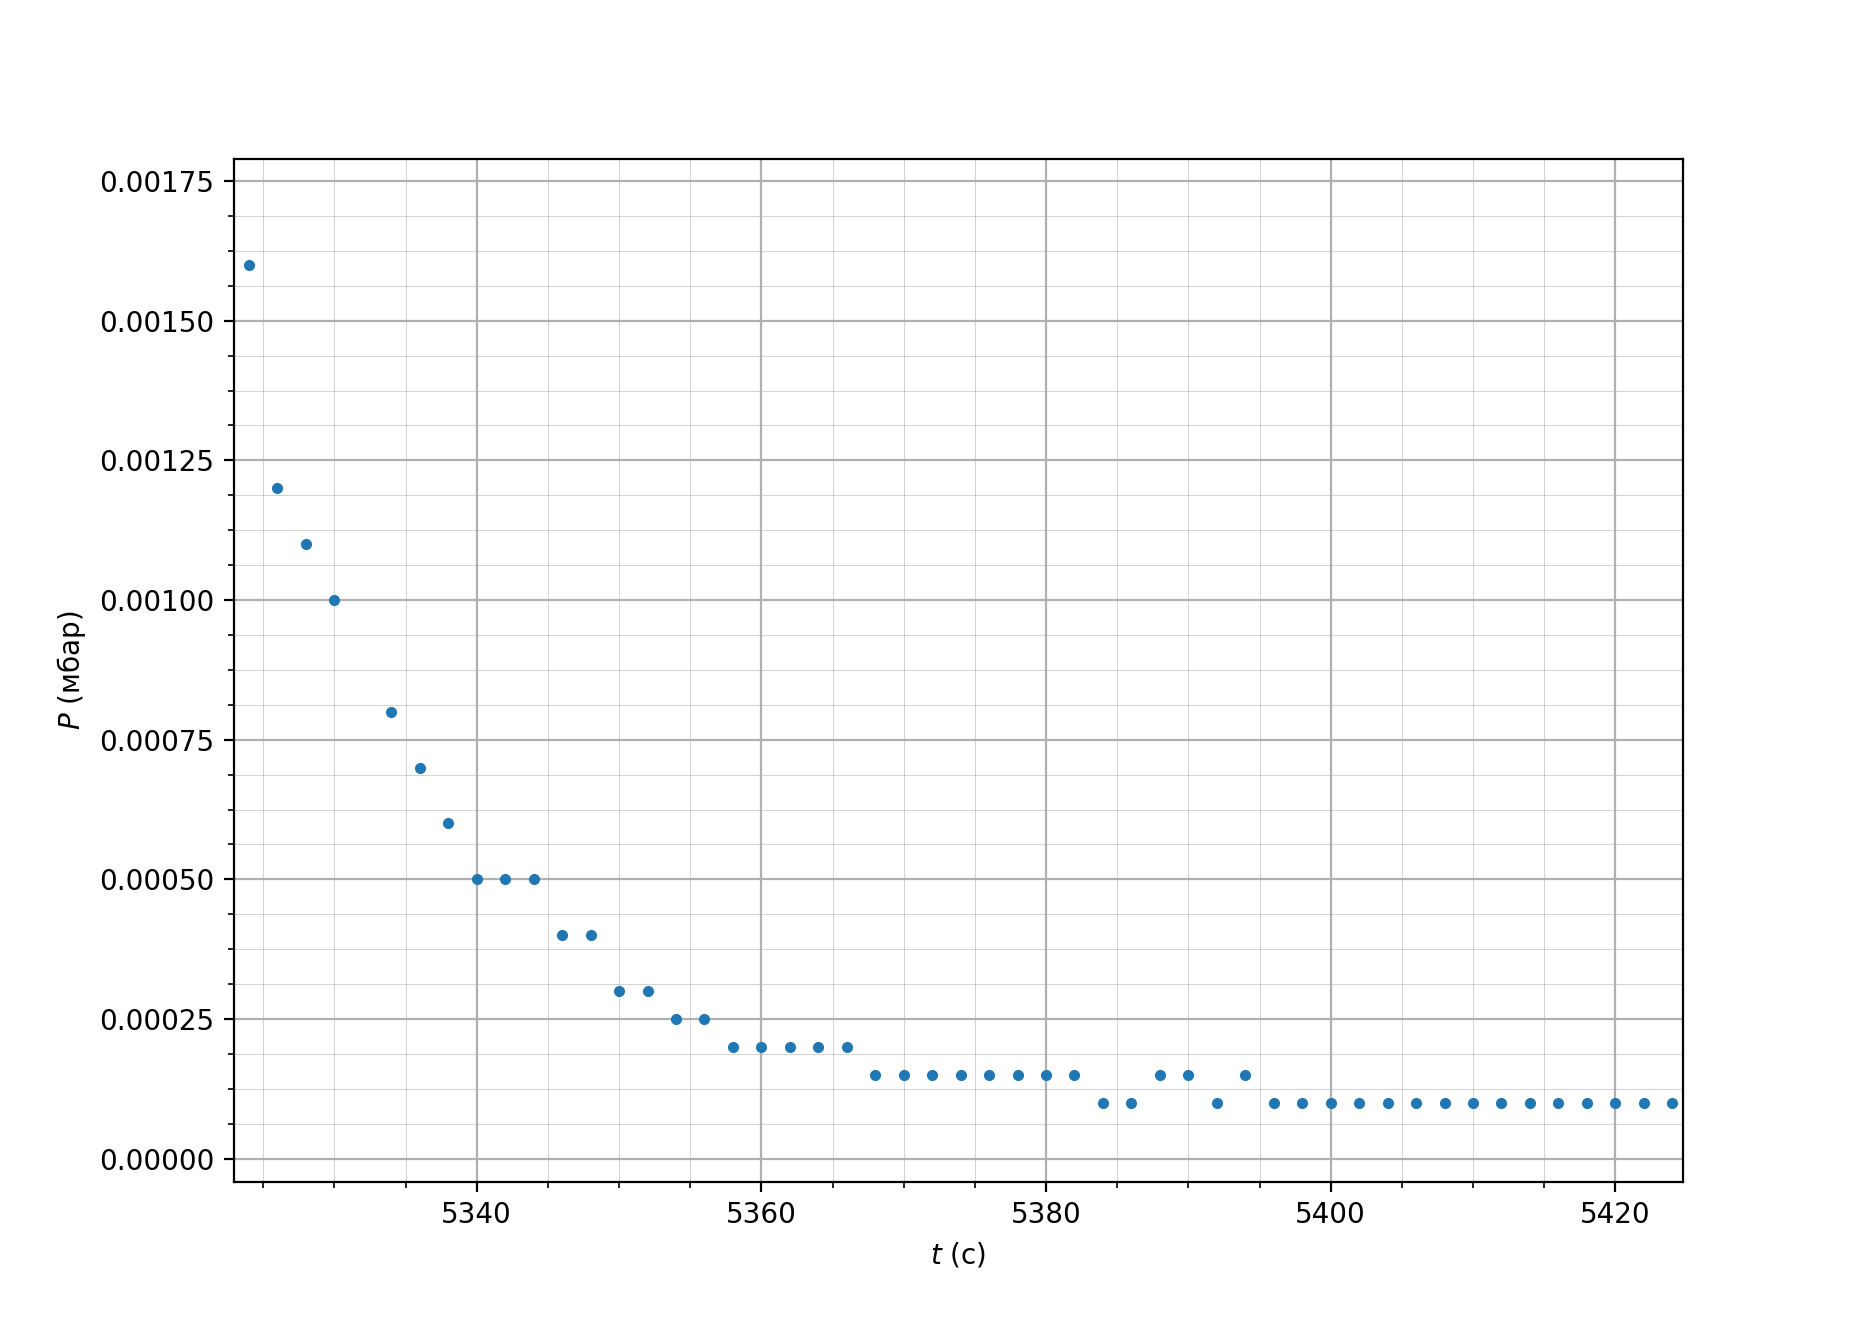

In [10]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linewidth='0.2')
plt.ylabel('$P$ (мбар)')
plt.xlabel('$t$ (с)')
plt.plot(time, p1, linestyle='', marker='.')

<IPython.core.display.Javascript object>


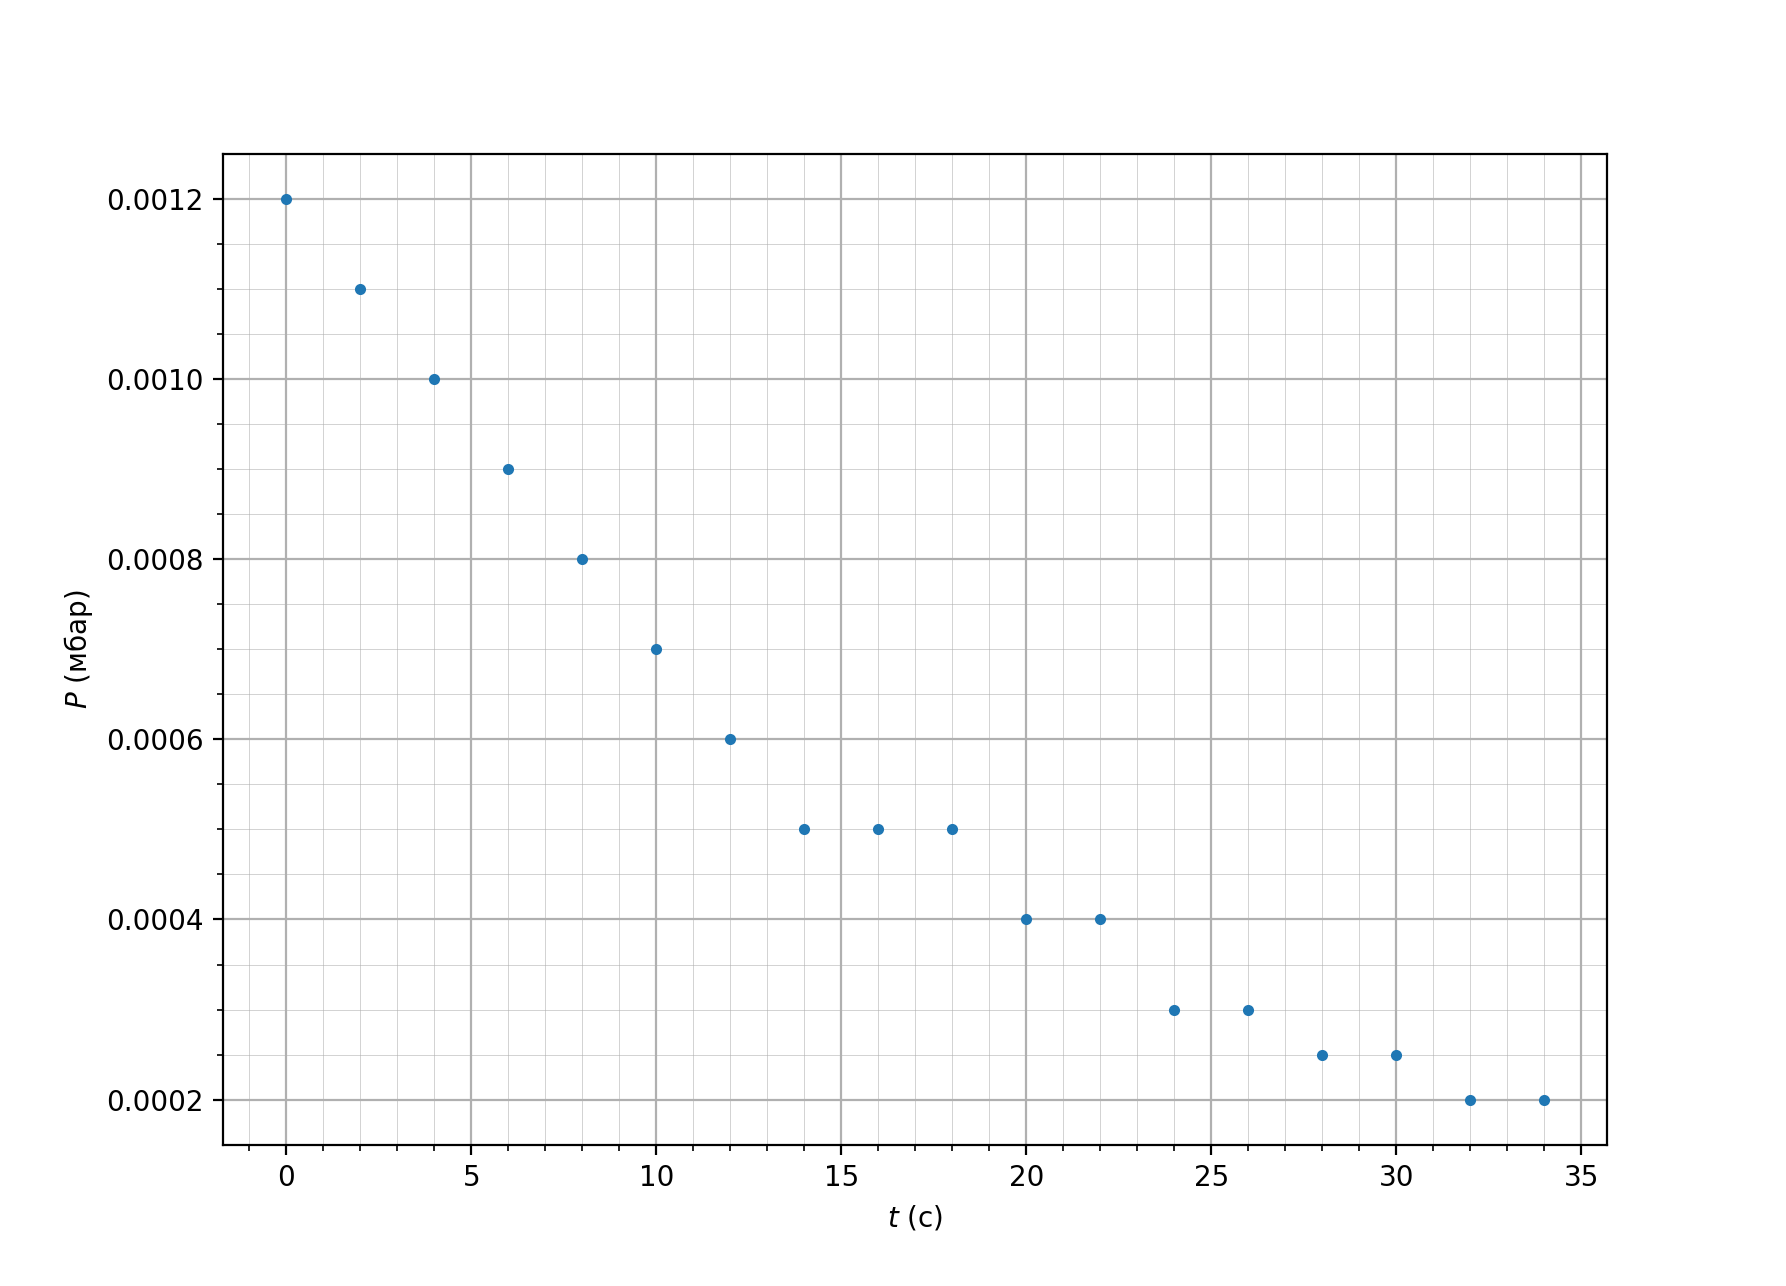

In [11]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

x1 = time[2663:2681] - time[2663]
y1 = p1[2663:2681]

#print(x1)
y1[3] = 0.0009
#print(y1)

plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linewidth='0.2')
plt.ylabel('$P$ (мбар)')
plt.xlabel('$t$ (с)')
plt.plot(x1, y1, linestyle='', marker='.')

<IPython.core.display.Javascript object>


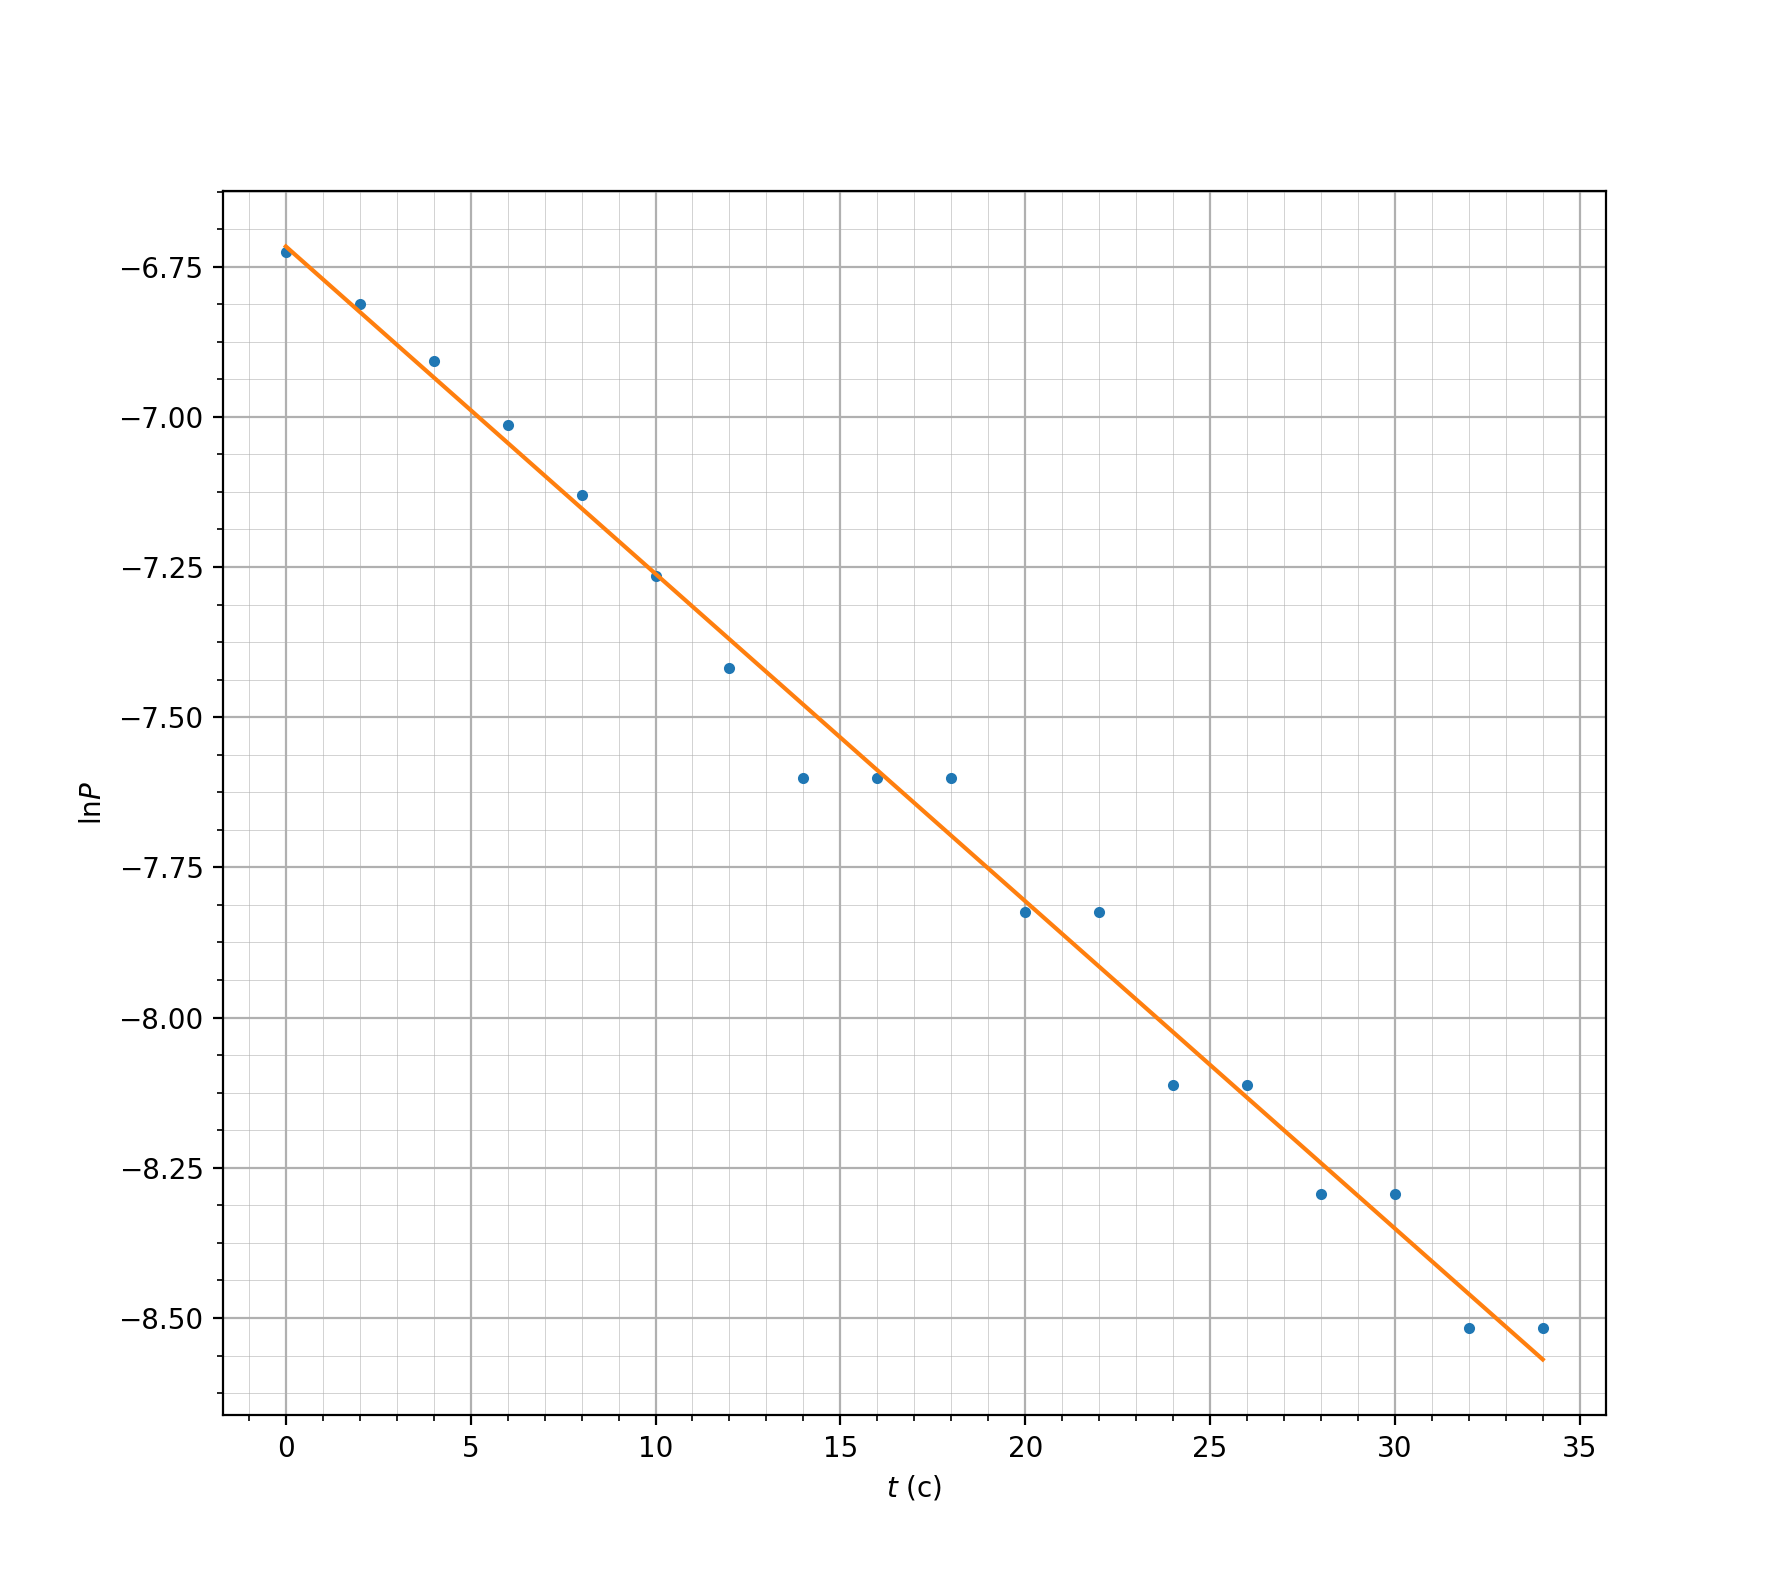

In [12]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

ln_p1 = np.array([math.log(y) for y in y1])
#print(ln_p1)

plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linewidth='0.2')
plt.ylabel('$\ln P$')
plt.xlabel('$t$ (с)')
plt.plot(x1, ln_p1, linestyle='', marker='.')

xdata = np.arange(0, 35, 2)

tau_opt, tau_cov = curve_fit(f, xdata, ln_p1)
#print(tau_opt)

plt.plot(xdata, f(xdata, *tau_opt))

In [13]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

tau = -1 / tau_opt[0]
print('tau =', tau)
s0 = v1 * tau
print('Эффективная скорость откачки:', s0, 'мл/с')

tau = 18.35252718543563
Эффективная скорость откачки: 19453.67881656177 мл/с


In [14]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

s1 = 67000
u = s0 * s1 / (s1 - s0)
print('U =', u)

U = 27413.193035082797


**VII.5.** Из файла возьмем данные зависимости давления в камере К от времени натекания после перекрытия откачки шибером ШЗ (пп. III.4, V.5). Рассчитаем натекание $Q_\text{н}$ (2.6).

<IPython.core.display.Javascript object>


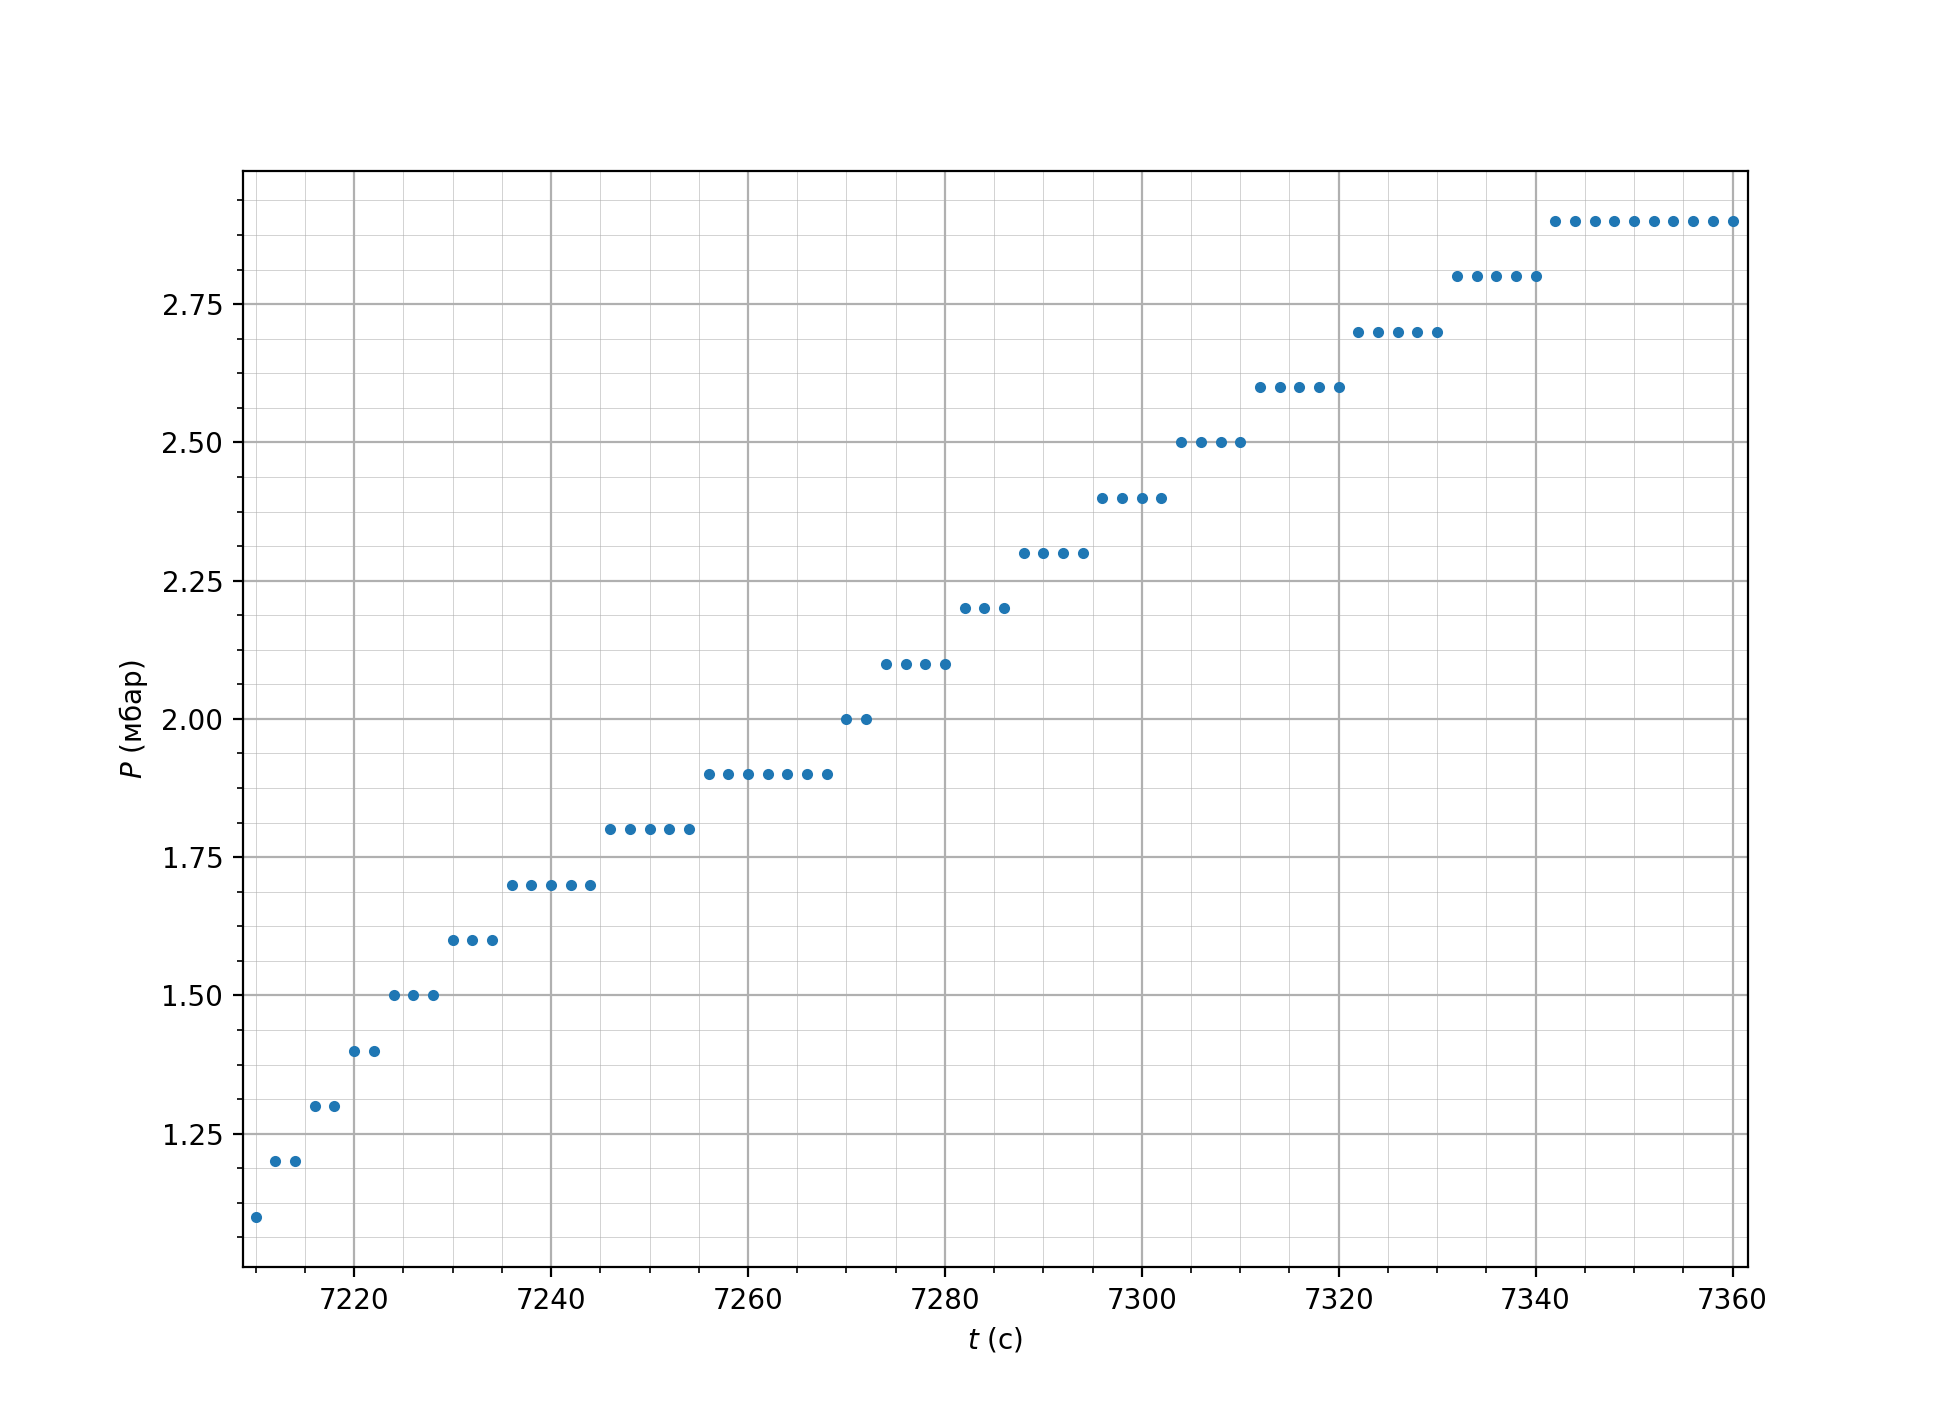

In [15]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linewidth='0.2')
plt.ylabel('$P$ (мбар)')
plt.xlabel('$t$ (с)')
plt.plot(time, p1, linestyle='', marker='.')

<IPython.core.display.Javascript object>


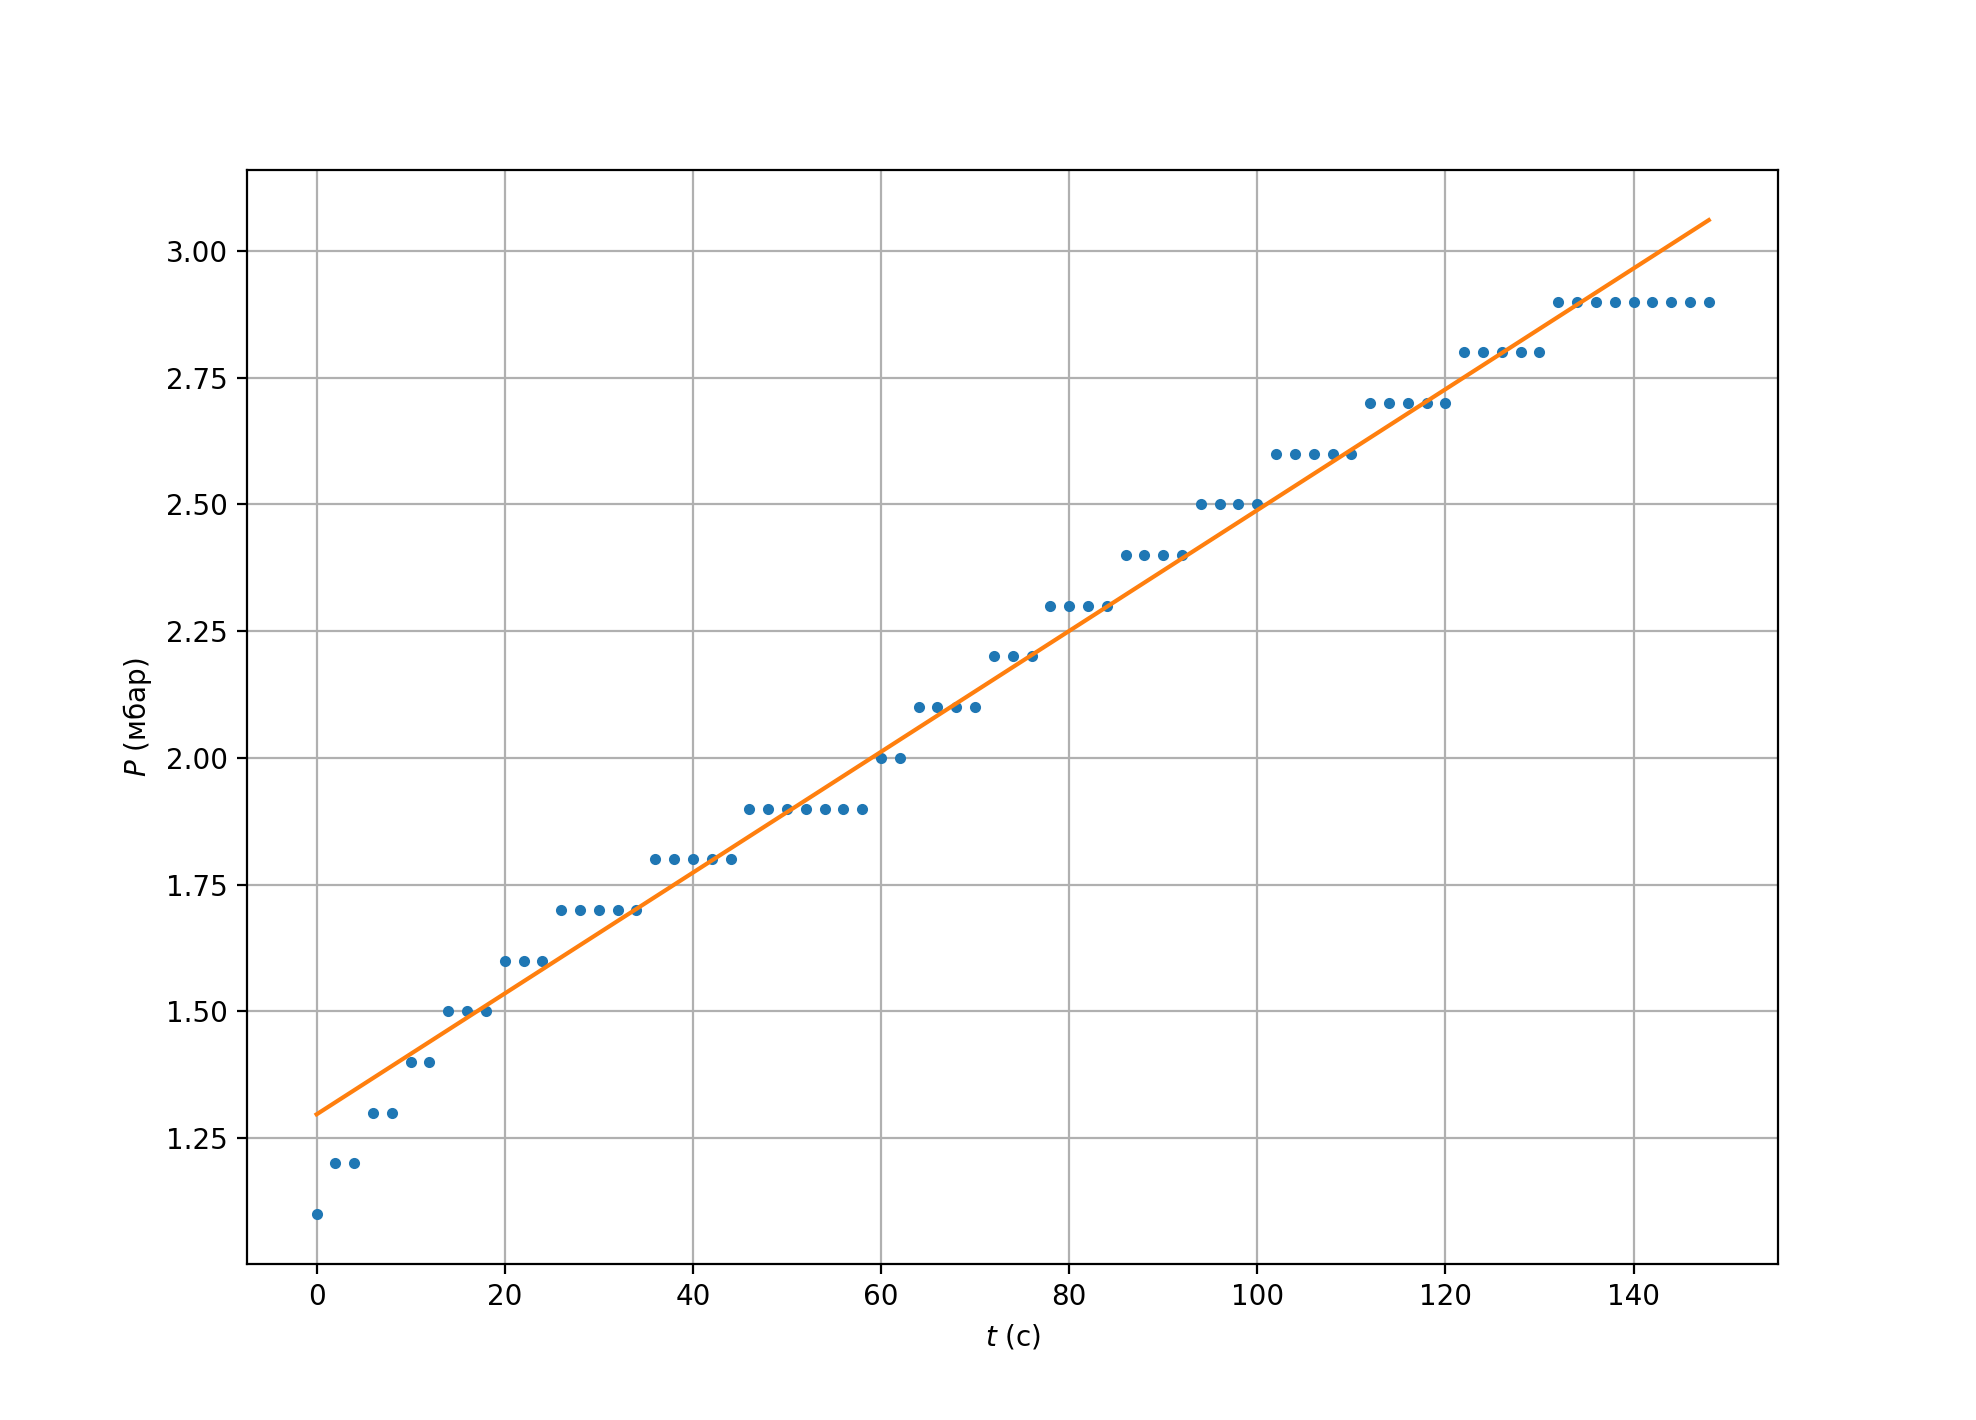

In [16]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

x2 = time[3605:3680] - time[3605]
y2 = p1[3605:3680]

x2 = np.array([float(x) for x in x2])
y2 = np.array([float(y) for y in y2])

q_opt, q_cov = curve_fit(f, x2, y2)

plt.grid(which='major')
plt.grid(which='minor', linewidth='0.2')
plt.ylabel('$P$ (мбар)')
plt.xlabel('$t$ (с)')
plt.plot(x2, y2, linestyle='', marker='.')
plt.plot(x2, f(x2, *q_opt))

In [17]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

q = v3 * q_opt[0]
print('Натекание: ', q, 'мл*мбар/с')

Натекание:  5.012915169903326 мл*мбар/с
